In [46]:
# Imports

from random import *
from math import *
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import csv
import copy

Nombre total de noeuds =331
Nombre de noeuds decrits =271
Nombre de liens =930


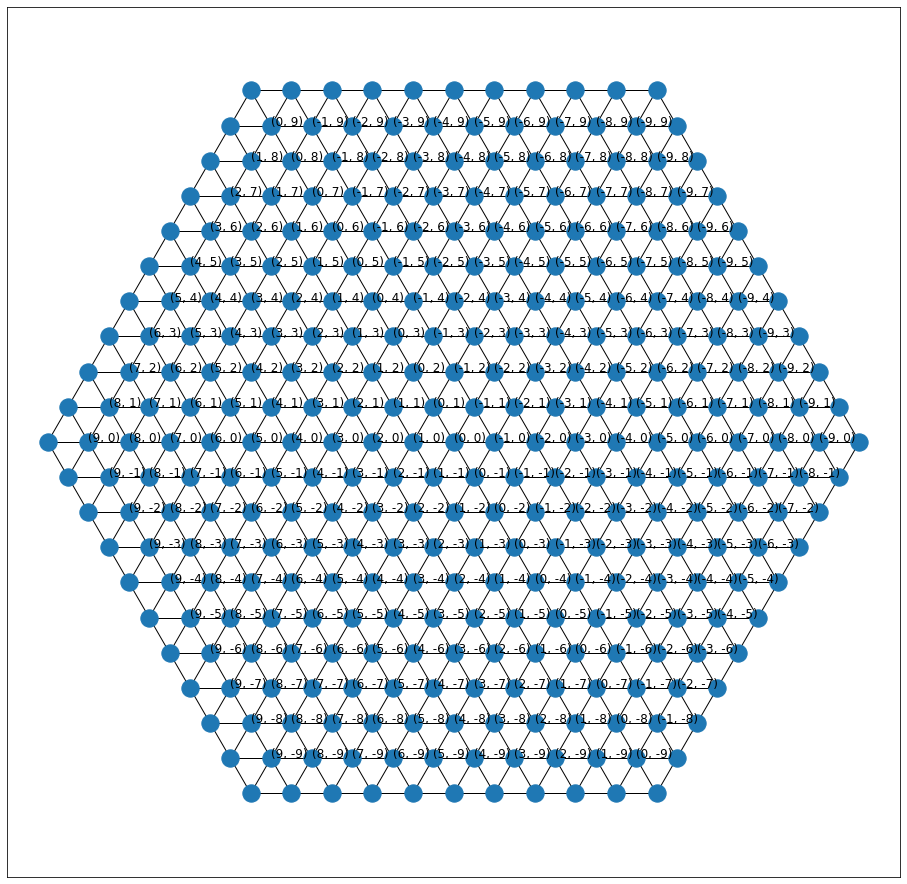

In [30]:
# Definition of the graph

l0 = 1.0

L = 11 # Lreal = L-1 

def nCouronne(L):
    
    N = 1 # Central nodes
    for l in range(L):
        N = N + 6*l # Ring k contains 6k nodes

    return(N)

N = nCouronne(L)
print('Nombre total de noeuds ='+str(N))
Nmat = nCouronne(L-1)
print('Nombre de noeuds decrits ='+str(Nmat))


G = nx.Graph(directed=False)
G.add_node((0,0))
pos = {}
pos[(0,0)] = (0,0)

for n in range(L):
    
    list = copy.deepcopy(G.nodes())
    
    for (q,r) in list: 
        
        G.add_edge((q,r),(q,r-1))
        pos[(q,r-1)] = (pos[(q,r)][0] + l0*cos(5*pi/3),pos[(q,r)][1] + l0*sin(5*pi/3))
        
        G.add_edge((q,r),(q-1,r))
        pos[(q-1,r)] = (pos[(q,r)][0] + l0,pos[(q,r)][1])
        
        G.add_edge((q,r),(q-1,r+1))
        pos[(q-1,r+1)] = (pos[(q,r)][0] + l0*cos(pi/3),pos[(q,r)][1] + l0*sin(pi/3))
        
        G.add_edge((q,r),(q,r+1))
        pos[(q,r+1)] = (pos[(q,r)][0] + l0*cos(2*pi/3),pos[(q,r)][1] + l0*sin(2*pi/3))
        
        G.add_edge((q,r),(q+1,r-1))
        pos[(q+1,r-1)] = (pos[(q,r)][0] + l0*cos(4*pi/3),pos[(q,r)][1] + l0*sin(4*pi/3))
        
        G.add_edge((q,r),(q+1,r))
        pos[(q+1,r)] = (pos[(q,r)][0] - l0,pos[(q,r)][1])

remove = [node for node,degree in dict(G.degree()).items() if degree <= 2]
G.remove_nodes_from(remove)
for node in remove:
    del pos[node]

# Pratical functions for graph use

def index2tuple(pos,i):
    # Return the tuple corresponding to node index i
    return [i for i in pos.keys()][i]

def tuple2index(pos,tuple):
    # Return the index corresponding to node tuple
    return [i for i in pos.keys()].index(tuple)

print('Nombre de liens ='+str(len([e for e in G.edges])))

X = []
Y = []
for i in range(N):
    X.append(pos[index2tuple(pos,i)][0])
    Y.append(pos[index2tuple(pos,i)][1])
X = np.array(X[0:], dtype=float)
Y = np.array(Y[0:], dtype=float)

plt.figure(figsize=(16,16))
nx.draw_networkx(G, pos, with_labels=False)
for i in range(Nmat):
    plt.text(X[i], Y[i], index2tuple(pos,i), fontsize=12, color='black')
plt.axis('equal')
plt.show()

In [32]:
alpha=1.0 # Mechanical tension

# Dynamical matrix definition

S = np.zeros([2*N,2*N])

for i in range(N):
    for neighbors in [p for p in G.neighbors(index2tuple(pos,i))]:
        j = tuple2index(pos,neighbors)
        S[2*i,2*j] = (X[i] - X[j])*(X[i] - X[j])
        S[2*i+1,2*j+1] = (Y[i] - Y[j])*(Y[i] - Y[j])
        S[2*i+1,2*j] = (Y[i] - Y[j])*(X[i] - X[j])
        S[2*i,2*j+1] = (X[i] - X[j])*(Y[i] - Y[j])
    S[2*i, 2*i] = -sum(S[2*i, 0::2])
    S[2*i+1, 2*i+1] = -sum(S[2*i+1, 1::2])
    S[2*i+1, 2*i] = -sum(S[2*i+1, 0::2])
    S[2*i, 2*i+1] = -sum(S[2*i, 1::2])
   
S = -S

dS = np.zeros([2*N,2*N])
M = np.zeros([2*N,2*N])
    
for i in range(N):
    Zi=0
    for neighbors in [p for p in G.neighbors(index2tuple(pos,i))]:
        j = tuple2index(pos,neighbors)
        dS[2*i,2*j] = (1/alpha)-1
        dS[2*i+1,2*j+1] = (1/alpha)-1
        Zi = Zi+1
    dS[2*i, 2*i] = Zi-(Zi/alpha)
    dS[2*i+1, 2*i+1] = Zi-(Zi/alpha)

M = (1/alpha)*S + dS

S = M
    
S = np.delete(S, [i for i in range(2*Nmat,2*N)], axis=0)
S = np.delete(S, [i for i in range(2*Nmat,2*N)], axis=1)
    
eigenvalues, eigenvectors = np.linalg.eigh(S)

In [33]:
eigenvalues, eigenvectors = np.linalg.eigh(S)

print ("eigs =",eigenvalues,"\n")
print ("eig\teigenvector" )
for iter in range(Nmat-1):
    vec = eigenvectors[:,iter]
    print (eigenvalues[iter],"\t",vec,"\t",sum(vec),"\n")

eigs = [0.05178597 0.05178597 0.06836358 0.12337893 0.12337893 0.13348499
 0.13348499 0.19498985 0.19822398 0.21564725 0.21809108 0.21809108
 0.2238578  0.29594834 0.29594834 0.32149311 0.32149311 0.32766597
 0.33062317 0.36485421 0.36485421 0.40661538 0.40661538 0.43041773
 0.43041773 0.44115168 0.45779995 0.45779995 0.48501206 0.50715259
 0.54246379 0.56687058 0.56687058 0.57405253 0.58808999 0.58808999
 0.60161605 0.60161605 0.62338186 0.62338186 0.6340364  0.6825879
 0.6825879  0.70855229 0.70855229 0.72780296 0.73956922 0.75676171
 0.75676171 0.76543305 0.77659822 0.77945011 0.83540831 0.83540831
 0.84751675 0.8738623  0.8738623  0.88707167 0.90076009 0.90076009
 0.90644827 0.91083924 0.91083924 0.91832133 0.97534119 0.97534119
 1.0002388  1.01045996 1.01045996 1.01773908 1.03728202 1.04770135
 1.04770135 1.05044631 1.05044631 1.0642809  1.0642809  1.1229644
 1.1229644  1.15174617 1.17325012 1.17325012 1.17668877 1.17820225
 1.18904244 1.20605382 1.20605382 1.22416475 1.22416475 1

0.321493106237857 	 [-7.74872782e-15  1.74849198e-01 -1.20911029e-02  1.49130793e-01
 -8.56986275e-15  1.28188388e-01  1.20911029e-02  1.49130793e-01
 -1.20911029e-02  1.49130793e-01  1.20911029e-02  1.49130793e-01
 -7.66505286e-15  1.28188388e-01 -3.82520045e-02  8.56704114e-02
 -3.03559303e-02  6.92263254e-02  5.73543892e-16  1.21804339e-01
 -9.21405171e-15  1.94159960e-02  3.03559303e-02  6.92263254e-02
  3.82520045e-02  8.56704114e-02 -1.29045994e-16  1.21804339e-01
 -3.82520045e-02  8.56704114e-02 -3.03559303e-02  6.92263254e-02
  3.82520045e-02  8.56704114e-02  3.03559303e-02  6.92263254e-02
 -8.29197822e-15  1.94159960e-02 -5.58773599e-02  1.67625557e-02
 -5.72900386e-02  2.96450975e-03 -2.27153377e-02  6.22378102e-02
 -3.40448335e-02 -3.66855284e-02  2.27153377e-02  6.22378102e-02
 -8.65312596e-15 -8.00198706e-02  3.40448335e-02 -3.66855284e-02
  5.72900386e-02  2.96450975e-03  5.58773599e-02  1.67625557e-02
  2.27153377e-02  6.22378102e-02 -2.27153377e-02  6.22378102e-02
 -5.5

0.7654330463163326 	 [ 3.89850254e-17 -2.81843164e-16  1.64847104e-02 -2.85523560e-02
  3.29694209e-02 -3.38331917e-15  1.64847104e-02  2.85523560e-02
 -1.64847104e-02  2.85523560e-02 -1.64847104e-02 -2.85523560e-02
 -3.29694209e-02  2.02096537e-15  2.26317813e-02 -3.91993951e-02
  4.48935262e-02 -2.59192894e-02 -9.12412234e-16 -5.18385789e-02
  4.52635626e-02 -1.51562388e-15  4.48935262e-02  2.59192894e-02
  2.26317813e-02  3.91993951e-02  5.40183220e-16  5.18385789e-02
 -2.26317813e-02  3.91993951e-02 -4.48935262e-02  2.59192894e-02
 -2.26317813e-02 -3.91993951e-02 -4.48935262e-02 -2.59192894e-02
 -4.52635626e-02  1.81803352e-16  7.79238375e-03 -1.34968046e-02
  5.25902728e-02 -2.78266047e-02 -2.19658979e-03 -5.94578146e-02
  5.03936830e-02 -3.16312099e-02  2.19658979e-03 -5.94578146e-02
  1.55847675e-02  3.98735705e-15  5.03936830e-02  3.16312099e-02
  5.25902728e-02  2.78266047e-02  7.79238375e-03  1.34968046e-02
 -2.19658979e-03  5.94578146e-02  2.19658979e-03  5.94578146e-02
 -7.

1.1766887701332291 	 [ 6.96185334e-19 -9.27143216e-16  5.06679523e-03 -8.77594678e-03
  1.01335905e-02  3.50040293e-16  5.06679523e-03  8.77594678e-03
 -5.06679523e-03  8.77594678e-03 -5.06679523e-03 -8.77594678e-03
 -1.01335905e-02  1.02038994e-15  9.21329856e-03 -1.59579012e-02
  5.11688741e-03 -2.95423632e-03  3.12830833e-15 -5.90847265e-03
  1.84265971e-02  1.18112120e-15  5.11688741e-03  2.95423632e-03
  9.21329856e-03  1.59579012e-02  4.01930790e-15  5.90847265e-03
 -9.21329856e-03  1.59579012e-02 -5.11688741e-03  2.95423632e-03
 -9.21329856e-03 -1.59579012e-02 -5.11688741e-03 -2.95423632e-03
 -1.84265971e-02  8.69689652e-16  1.51912604e-02 -2.63120349e-02
 -6.91868991e-03 -5.32586598e-03  8.07168019e-03  3.32882823e-03
  1.15299029e-03  8.65469421e-03 -8.07168019e-03  3.32882823e-03
  3.03825209e-02 -8.49271228e-16  1.15299029e-03 -8.65469421e-03
 -6.91868991e-03  5.32586598e-03  1.51912604e-02  2.63120349e-02
  8.07168019e-03 -3.32882823e-03 -8.07168019e-03 -3.32882823e-03
 -1.

1.4846086332325334 	 [ 0.00000000e+00 -2.61910337e-15  2.35123706e-02 -4.07074094e-02
 -2.34301982e-02 -4.06493578e-03 -1.53027039e-02 -1.83924003e-02
 -2.35123706e-02  4.07074094e-02  1.53027039e-02  1.83924003e-02
  2.34301982e-02  4.06493578e-03  2.65804575e-02 -4.63297702e-02
  2.53013811e-03  1.71702439e-02 -1.61691670e-02  6.35343538e-03
 -2.66215960e-02  6.87444526e-02  1.10224513e-02  6.40334123e-03
  4.60127111e-02 -5.75014844e-02  1.61691670e-02 -6.35343538e-03
 -2.65804575e-02  4.63297702e-02 -2.53013811e-03 -1.71702439e-02
 -4.60127111e-02  5.75014844e-02 -1.10224513e-02 -6.40334123e-03
  2.66215960e-02 -6.87444526e-02  1.07834049e-02 -1.86615239e-02
  2.84205246e-02  1.92480236e-02 -3.09930753e-02 -1.51778627e-02
 -2.40468905e-02  6.26509477e-02 -4.22754427e-02  5.21041513e-02
 -1.07422706e-02 -3.75086214e-03  2.64448124e-02  2.84267749e-02
  3.76398052e-02  8.75160335e-03 -8.64685789e-03 -7.49095424e-03
  4.22754427e-02 -5.21041513e-02  3.09930753e-02  1.51778627e-02
 -1.

1.7772494731114485 	 [ 0.00000000e+00 -2.39970798e-14 -1.81519190e-02  8.75426584e-03
  2.46874165e-02 -2.99103076e-03 -1.64285598e-02  2.12741411e-04
  1.81519190e-02 -8.75426584e-03  1.64285598e-02 -2.12741411e-04
 -2.46874165e-02  2.99103076e-03 -7.12194763e-02 -1.45963299e-02
 -2.18350034e-02 -2.02909696e-02  5.94495100e-03 -2.69444513e-02
  3.40416117e-02 -1.81884386e-02 -2.70170972e-02  1.04344482e-02
 -8.10229864e-02  3.39930296e-02 -5.94495100e-03  2.69444513e-02
  7.12194763e-02  1.45963299e-02  2.18350034e-02  2.02909696e-02
  8.10229864e-02 -3.39930296e-02  2.70170972e-02 -1.04344482e-02
 -3.40416117e-02  1.81884386e-02 -2.77592332e-02  8.35966657e-03
 -4.49475698e-02  1.24621861e-02 -2.18066517e-02 -2.19301510e-02
  2.41100133e-02 -1.03541319e-02  2.35997672e-02 -3.67901889e-02
  3.13003055e-02 -5.23702256e-03  1.32050001e-02 -6.13844818e-03
 -5.09173416e-02 -7.78277917e-03 -2.68254803e-02  3.73168597e-03
 -2.35997672e-02  3.67901889e-02  2.18066517e-02  2.19301510e-02
  2.

1.9873689258302607 	 [-3.42905444e-15  1.69437113e-15 -2.60572957e-02 -1.50441867e-02
  1.55097661e-15 -3.00883734e-02  2.60572957e-02 -1.50441867e-02
  2.60572957e-02  1.50441867e-02 -2.60572957e-02  1.50441867e-02
  6.60848324e-16  3.00883734e-02  4.61943420e-02  2.66703158e-02
  8.46634416e-03  1.46641382e-02  1.69326883e-02  5.61583044e-14
 -7.87458753e-14  5.33406316e-02 -8.46634416e-03  1.46641382e-02
 -4.61943420e-02  2.66703158e-02 -1.69326883e-02 -6.64020219e-14
 -4.61943420e-02 -2.66703158e-02 -8.46634416e-03 -1.46641382e-02
  4.61943420e-02 -2.66703158e-02  8.46634416e-03 -1.46641382e-02
  7.52280183e-14 -5.33406316e-02 -6.60924492e-02 -3.81584933e-02
  1.42525291e-02 -4.85650388e-02 -3.49322928e-02  3.66255717e-02
 -4.91848219e-02 -1.19394671e-02 -3.49322928e-02 -3.66255717e-02
  1.12498552e-13 -7.63169867e-02  4.91848219e-02 -1.19394671e-02
 -1.42525291e-02 -4.85650388e-02  6.60924492e-02 -3.81584933e-02
  3.49322928e-02  3.66255717e-02  3.49322928e-02 -3.66255717e-02
  6.

2.1494994300902732 	 [-5.85259591e-16  1.09228523e-15  1.60584635e-02 -4.70102205e-02
 -9.19297662e-02 -3.94440117e-04  1.29404745e-02  4.23985854e-02
 -1.60584635e-02  4.70102205e-02 -1.29404745e-02 -4.23985854e-02
  9.19297662e-02  3.94440117e-04 -5.46198725e-03 -6.17897678e-02
 -1.09856303e-03 -5.60960301e-02  1.93933108e-03  5.76771043e-02
 -9.57759248e-02 -1.46404077e-03  2.88819753e-03  5.61584407e-02
 -9.62243636e-03  5.75117401e-02 -1.93933108e-03 -5.76771043e-02
  5.46198725e-03  6.17897678e-02  1.09856303e-03  5.60960301e-02
  9.62243636e-03 -5.75117401e-02 -2.88819753e-03 -5.61584407e-02
  9.57759248e-02  1.46404077e-03 -9.18211300e-02 -3.92198316e-02
 -1.30397911e-02 -2.11915843e-03 -3.58367790e-02  4.98394722e-02
  6.08603578e-02 -6.26078175e-03  3.51794240e-02  4.72314452e-02
  2.25295480e-02 -4.07379602e-03  6.31779939e-02  5.50181724e-03
 -1.06083154e-02  6.37907204e-03 -9.46687204e-02  4.24352525e-02
 -3.51794240e-02 -4.72314452e-02  3.58367790e-02 -4.98394722e-02
  9.

2.3494215669116083 	 [ 1.00680839e-18 -2.99805491e-16 -1.54525345e-03  2.67645748e-03
 -3.09050690e-03 -1.42162674e-15 -1.54525345e-03 -2.67645748e-03
  1.54525345e-03 -2.67645748e-03  1.54525345e-03  2.67645748e-03
  3.09050690e-03  8.16587194e-16  4.44309818e-02 -7.69567179e-02
 -9.24178342e-02  5.33574615e-02  2.09687471e-15  1.06714923e-01
  8.88619636e-02  1.12478268e-16 -9.24178342e-02 -5.33574615e-02
  4.44309818e-02  7.69567179e-02 -2.47344056e-15 -1.06714923e-01
 -4.44309818e-02  7.69567179e-02  9.24178342e-02 -5.33574615e-02
 -4.44309818e-02 -7.69567179e-02  9.24178342e-02  5.33574615e-02
 -8.88619636e-02  6.16255500e-16  9.09397489e-03 -1.57512266e-02
  4.27142342e-02  6.91610545e-02 -8.12523472e-02 -2.41108464e-03
 -3.85381131e-02 -7.15721391e-02  8.12523472e-02 -2.41108464e-03
  1.81879498e-02  7.22453625e-16 -3.85381131e-02  7.15721391e-02
  4.27142342e-02 -6.91610545e-02  9.09397489e-03  1.57512266e-02
 -8.12523472e-02  2.41108464e-03  8.12523472e-02  2.41108464e-03
 -9.

2.580683746608258 	 [ 5.85150761e-02  2.01835076e-14 -1.31043779e-01 -8.03801786e-02
  8.17877417e-03 -5.91193761e-14 -1.31043779e-01  8.03801786e-02
 -1.31043779e-01 -8.03801786e-02 -1.31043779e-01  8.03801786e-02
  8.17877417e-03 -5.87169202e-14  3.01526895e-02 -1.13125881e-02
  4.14235476e-02 -1.10725878e-02  2.22452629e-02  1.51510748e-14
  4.97466668e-02  1.02027761e-14  4.14235476e-02  1.10725878e-02
  3.01526895e-02  1.13125881e-02  2.22452629e-02  1.57512892e-14
  3.01526895e-02 -1.13125881e-02  4.14235476e-02 -1.10725878e-02
  3.01526895e-02  1.13125881e-02  4.14235476e-02  1.10725878e-02
  4.97466668e-02  1.00107233e-14 -3.86119250e-02  2.64847993e-02
  3.12900254e-02 -1.82205595e-02  2.94024894e-02 -8.01989670e-02
  1.15580068e-01 -3.26238579e-02  2.94024894e-02  8.01989670e-02
 -8.44849431e-02 -7.43401011e-15  1.15580068e-01  3.26238579e-02
  3.12900254e-02  1.82205595e-02 -3.86119250e-02 -2.64847993e-02
  2.94024894e-02  8.01989670e-02  2.94024894e-02 -8.01989670e-02
 -3.8

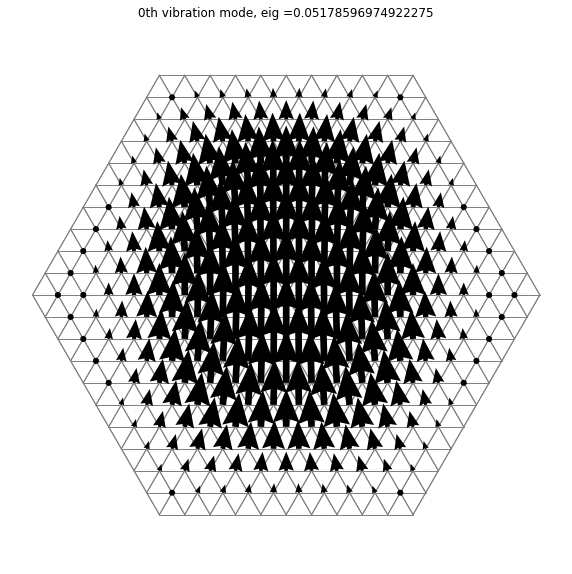

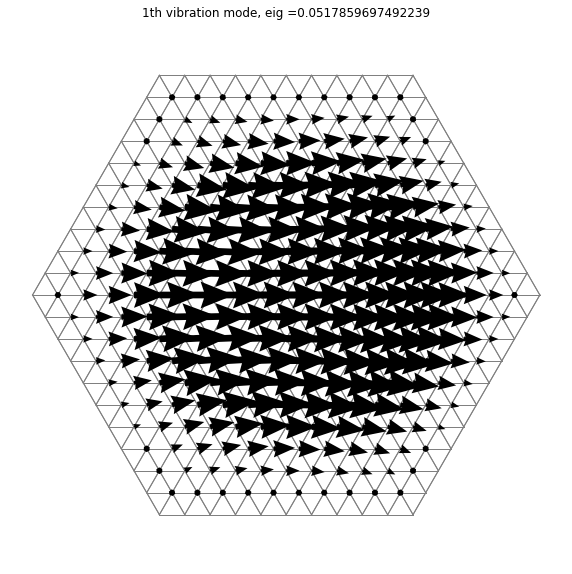

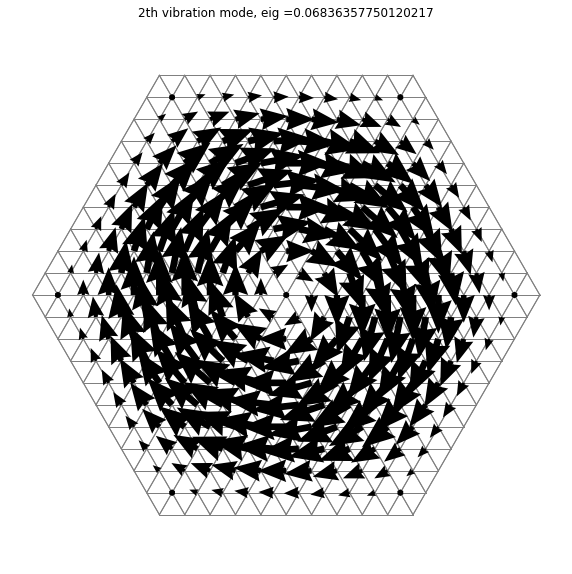

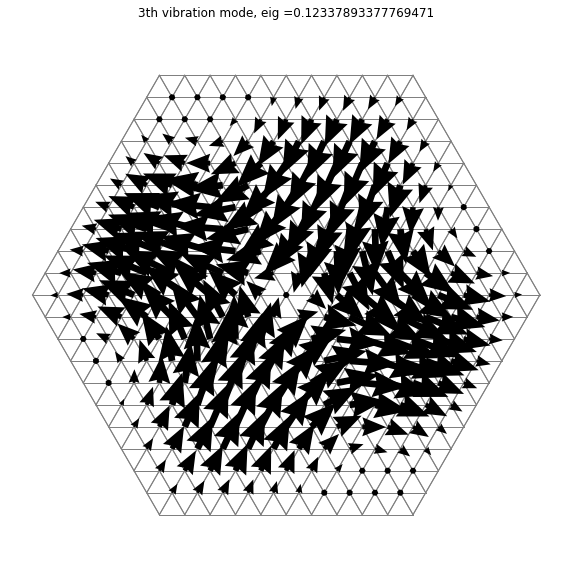

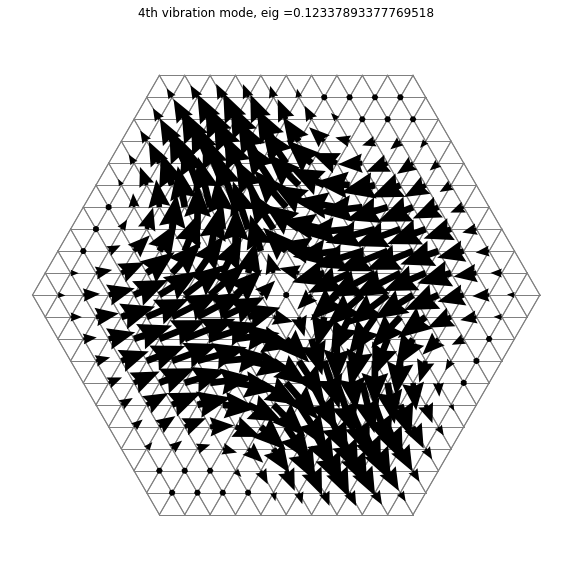

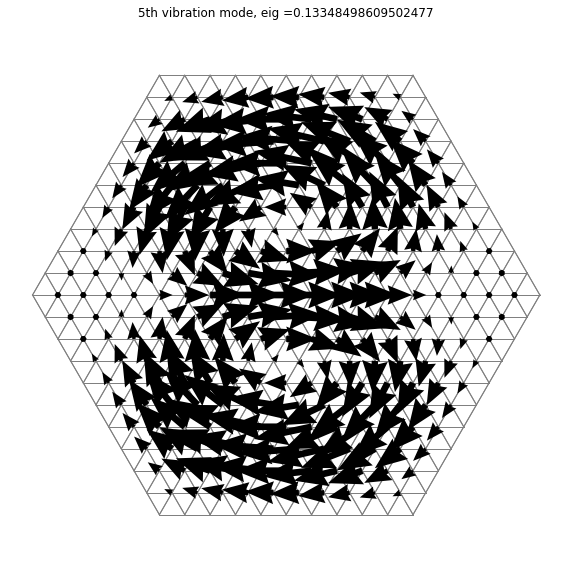

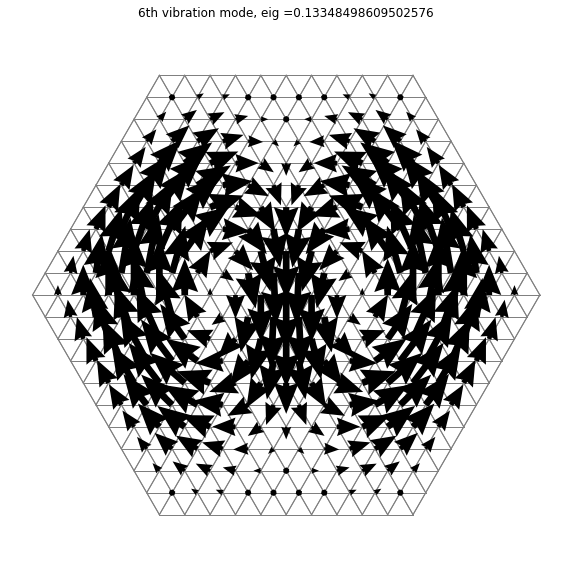

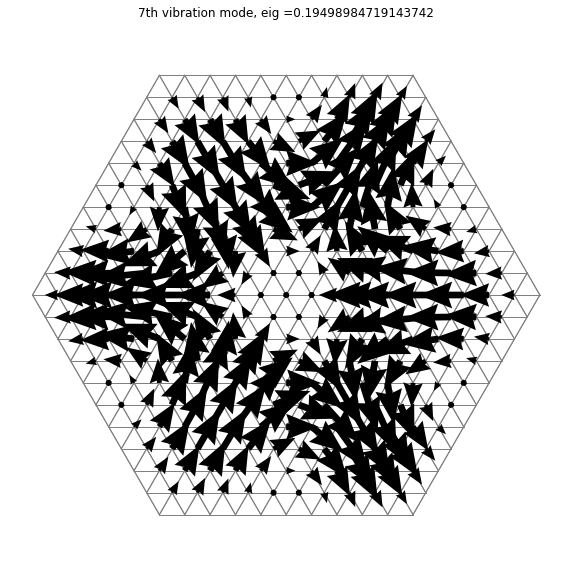

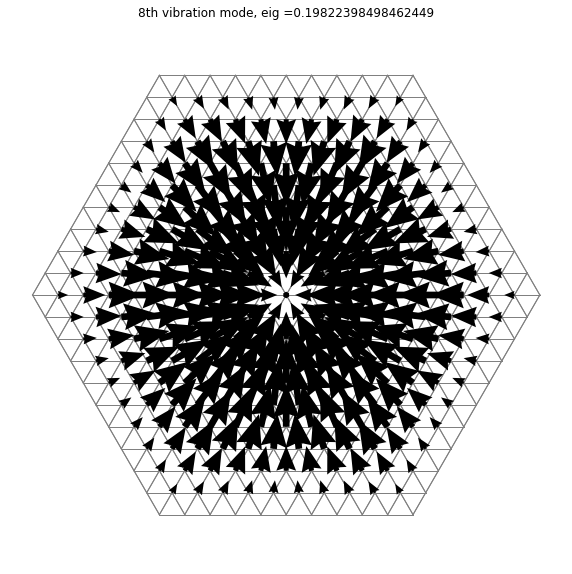

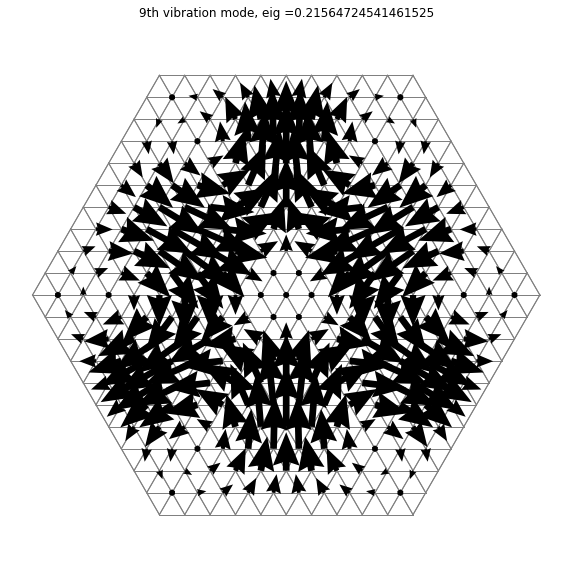

In [34]:
for i in range(10): # Show ten first modes
    
    eig_tmp = eigenvectors[:,i]
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]

    fig = plt.figure(figsize=(10,10))
    
    plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    for l in range(N):
        for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            j = tuple2index(pos,neighbors)
            plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=1.0, linewidth=5.0, headwidth=4)
    xmin, xmax, ymin, ymax = plt.axis("equal")
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
    plt.show()

In [35]:
def makeRotationMatrix(theta):
    
    sig = np.array([[cos(theta), -sin(theta)], [sin(theta), cos(theta)]], dtype=float)
    
    return(sig)

def createMapping(X, Y):
    
    # Rotation
    
    sig = makeRotationMatrix(pi/3)
    mappingRot = {}
    
    for i in range(Nmat):
        
        Xr, Yr = np.dot(sig, [X[i], Y[i]])
        distij = []
        
        for j in range(Nmat):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRot[i] = min_index
            
    # Reflection
    
    mappingRefl = {}
    
    for i in range(Nmat):
        
        Xr, Yr = X[i], -Y[i]
        distij = []
        
        for j in range(Nmat):
            
            dist_ = sqrt((X[j] - Xr)**2 + (Y[j] - Yr)**2)
            distij.append(dist_)
            
        min_value = min(distij)
        min_index = distij.index(min_value)
        
        mappingRefl[i] = min_index
    
    return(mappingRot, mappingRefl)

mappingRot, mappingRefl = createMapping(X, Y)
print(mappingRot)
print(mappingRefl)

{0: 0, 1: 2, 2: 3, 3: 4, 4: 6, 5: 1, 6: 5, 7: 10, 8: 11, 9: 8, 10: 12, 11: 13, 12: 14, 13: 15, 14: 18, 15: 17, 16: 7, 17: 9, 18: 16, 19: 24, 20: 25, 21: 22, 22: 26, 23: 20, 24: 27, 25: 28, 26: 29, 27: 30, 28: 31, 29: 32, 30: 36, 31: 35, 32: 34, 33: 19, 34: 21, 35: 23, 36: 33, 37: 44, 38: 45, 39: 42, 40: 46, 41: 40, 42: 47, 43: 38, 44: 48, 45: 49, 46: 50, 47: 51, 48: 52, 49: 53, 50: 54, 51: 55, 52: 60, 53: 59, 54: 58, 55: 57, 56: 37, 57: 39, 58: 41, 59: 43, 60: 56, 61: 70, 62: 71, 63: 68, 64: 72, 65: 66, 66: 73, 67: 64, 68: 74, 69: 62, 70: 75, 71: 76, 72: 77, 73: 78, 74: 79, 75: 80, 76: 81, 77: 82, 78: 83, 79: 84, 80: 90, 81: 89, 82: 88, 83: 87, 84: 86, 85: 61, 86: 63, 87: 65, 88: 67, 89: 69, 90: 85, 91: 102, 92: 103, 93: 100, 94: 104, 95: 98, 96: 105, 97: 96, 98: 106, 99: 94, 100: 107, 101: 92, 102: 108, 103: 109, 104: 110, 105: 111, 106: 112, 107: 113, 108: 114, 109: 115, 110: 116, 111: 117, 112: 118, 113: 119, 114: 126, 115: 125, 116: 124, 117: 123, 118: 122, 119: 121, 120: 91, 121: 

In [36]:
def reflection(Nmat, vec):
    
    mapping = mappingRefl

    reflectedVec = np.zeros(2*Nmat)
    
    for i in range(Nmat):
        
        ui_reflected = [vec[2*i], -vec[2*i+1]]
        
        reflectedVec[2*mapping[i]:2*mapping[i]+2] = ui_reflected
        
    return reflectedVec
    
def rotation(Nmat, vec, ang):
    
    mapping = mappingRot
    
    rotatedVec = np.zeros(2*Nmat)
    
    sig = makeRotationMatrix(ang)
    
    for i in range(Nmat):
        
        ui = [vec[2*i], vec[2*i+1]]
        ui_rotated = np.dot(sig,ui)
        
        rotatedVec[2*mapping[i]:2*mapping[i]+2] = ui_rotated
        
    return rotatedVec

def scalarProduct(vec1, vec2):
    
    scPr = 0
    
    ux1 = vec1[0::2]
    uy1 = vec1[1::2]
    
    ux2 = vec2[0::2]
    uy2 = vec2[1::2]
    
    scPr = np.sum(ux1*ux2 + uy1*uy2)
    
    return scPr

In [37]:
RotationSym = []
ReflectionSym = []

for i in range(2*Nmat):
    
    print(i)
    
    eig_tmp = eigenvectors[:,i]
    ux = eig_tmp[0::2]
    uy = eig_tmp[1::2]
    
    # -------------------------------------------------------------------------------------
    # Uncomment the following to also plot the modes (might slow down drastically the code)
    # -------------------------------------------------------------------------------------

    #fig = plt.figure(figsize=(4,4))
    
    #plt.subplot(1,3,1)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
    #plt.show()
    
    ##eig_tmp = rotation(Nmat, eigenvectors[:,i], pi/3)
    #ux = eig_tmp[0::2]
    #uy = eig_tmp[1::2]
    
    #plt.subplot(1,3,2)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(r'rotated from $\pi/3$')
    
    #eig_tmp = reflection(Nmat, eigenvectors[:,i])
    #ux = eig_tmp[0::2]
    #uy = eig_tmp[1::2]
    
    #plt.subplot(1,3,3)
    
    #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
    #for l in range(N):
    #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
    #        j = tuple2index(pos,neighbors)
    #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
    #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
    #xmin, xmax, ymin, ymax = plt.axis("equal")
    #plt.xticks([])
    #plt.yticks([])
    #plt.axis('off')
    #plt.title(r'reflection with (y=0)')
    
    #plt.show()
    
    RotationSym_ = scalarProduct(eigenvectors[:,i],rotation(Nmat, eigenvectors[:,i], pi/3))
    ReflectionSym_ = scalarProduct(eigenvectors[:,i],reflection(Nmat, eigenvectors[:,i]))
    
    RotationSym.append(RotationSym_)
    ReflectionSym.append(ReflectionSym_)
    
    print('Scalar product of the mode with itself:')
    print(scalarProduct(eigenvectors[:,i],eigenvectors[:,i])) 
    print('Scalar product of the mode with itself rotated from pi/3:')
    print(RotationSym_)
    print('Scalar product of the mode reflected:')
    print(ReflectionSym_)

0
Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000002
1
Scalar product of the mode with itself:
0.9999999999999997
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
0.9999999999999997
2
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
1.0000000000000009
Scalar product of the mode reflected:
-1.0000000000000009
3
Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
0.020592111998862815
4
Scalar product of the mode with itself:
0.9999999999999999
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999983
Scalar product of the mode reflected:
-0.02059211199886281
5
Scalar product of the mode wi

Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
1.0
86
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
-0.9999999999999999
87
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000004
Scalar product of the mode reflected:
1.0000000000000009
88
Scalar product of the mode with itself:
0.9999999999999999
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999998
89
Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000007
Scalar product of the mode reflected:
1.0000000000000007
90
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of 

Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000002
Scalar product of the mode reflected:
1.0000000000000002
134
Scalar product of the mode with itself:
0.9999999999999996
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999998
Scalar product of the mode reflected:
0.9999999999999996
135
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999996
Scalar product of the mode reflected:
-0.9999999999999993
136
Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004
137
Scalar product of the mode with itself:
0.9999999999999994
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999994
138
Scalar prod

Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999992
179
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
1.0
Scalar product of the mode reflected:
1.0
180
Scalar product of the mode with itself:
0.9999999999999992
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999993
181
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999999
182
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999994
Scalar product of the mode reflected:
0.4841014385178093
183
Scalar product of the mode with itself:
0.9999999999999988
Scalar prod

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004
248
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
0.5
Scalar product of the mode reflected:
0.9999999999999999
249
Scalar product of the mode with itself:
1.000000000000001
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000007
Scalar product of the mode reflected:
0.832151680419901
250
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000004
Scalar product of the mode reflected:
-0.8321516804199012
251
Scalar product of the mode with itself:
0.9999999999999999
Scalar product of the mode with itself rotated from pi/3:
-1.0
Scalar product of the mode reflected:
-1.0
252
Scalar product of the mode with itself:
0.9999999999999993
Scalar produ

Scalar product of the mode with itself:
0.9999999999999994
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999997
Scalar product of the mode reflected:
-0.9999999999999994
293
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999998
Scalar product of the mode reflected:
0.9999999999999997
294
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000004
Scalar product of the mode reflected:
-0.7099011937254988
295
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999994
Scalar product of the mode reflected:
0.709901193725498
296
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
0.29291214695492873
297
Scalar product of the mo

Scalar product of the mode with itself:
1.0000000000000013
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000007
Scalar product of the mode reflected:
-0.2794415527516646
339
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
-1.0
Scalar product of the mode reflected:
-1.0000000000000002
340
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999994
341
Scalar product of the mode with itself:
0.9999999999999994
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999997
Scalar product of the mode reflected:
-0.9999999999999993
342
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
1.0
343
Scalar product of the mode with itself:
0.9999999999999994
Scalar pro

Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000001
Scalar product of the mode reflected:
0.34342018130818924
388
Scalar product of the mode with itself:
0.9999999999999991
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999992
Scalar product of the mode reflected:
-0.9999999999999991
389
Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000004
Scalar product of the mode reflected:
-1.0000000000000004
390
Scalar product of the mode with itself:
0.9999999999999999
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
1.0
391
Scalar product of the mode with itself:
0.9999999999999999
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999999
392
Scalar product of the mo

Scalar product of the mode with itself:
1.0000000000000002
Scalar product of the mode with itself rotated from pi/3:
1.0000000000000004
Scalar product of the mode reflected:
-1.0000000000000004
437
Scalar product of the mode with itself:
0.9999999999999992
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999992
Scalar product of the mode reflected:
0.9999999999999993
438
Scalar product of the mode with itself:
1.0
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-0.8383902855335632
439
Scalar product of the mode with itself:
1.000000000000001
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000007
Scalar product of the mode reflected:
0.8383902855335644
440
Scalar product of the mode with itself:
0.9999999999999998
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-1.0
441
Scalar product of the mode with itself:
1.00000000000000

Scalar product of the mode with itself:
1.0000000000000004
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000002
Scalar product of the mode reflected:
-0.41128797877978146
515
Scalar product of the mode with itself:
1.0000000000000009
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000009
Scalar product of the mode reflected:
-1.0000000000000009
516
Scalar product of the mode with itself:
0.9999999999999989
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999995
Scalar product of the mode reflected:
-0.9999999999999989
517
Scalar product of the mode with itself:
0.9999999999999993
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999996
518
Scalar product of the mode with itself:
1.0000000000000013
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000013
Scalar product of the mode reflected:
-1.0000000000000013
519
Scalar

In [38]:
for i in range(2*Nmat):
    print(i, eigenvalues[i])
    print("Rotation symmetry : ", RotationSym[i])
    print("Reflection symmetry : ", ReflectionSym[i])
    print('')

0 0.05178596974922275
Rotation symmetry :  0.5000000000000002
Reflection symmetry :  -1.0000000000000002

1 0.0517859697492239
Rotation symmetry :  0.5
Reflection symmetry :  0.9999999999999997

2 0.06836357750120217
Rotation symmetry :  1.0000000000000009
Reflection symmetry :  -1.0000000000000009

3 0.12337893377769471
Rotation symmetry :  -0.4999999999999999
Reflection symmetry :  0.020592111998862815

4 0.12337893377769518
Rotation symmetry :  -0.49999999999999983
Reflection symmetry :  -0.02059211199886281

5 0.13348498609502477
Rotation symmetry :  0.4999999999999995
Reflection symmetry :  0.9999999999999991

6 0.13348498609502576
Rotation symmetry :  0.5000000000000007
Reflection symmetry :  -1.000000000000001

7 0.19498984719143742
Rotation symmetry :  -1.0000000000000004
Reflection symmetry :  1.0000000000000004

8 0.19822398498462449
Rotation symmetry :  1.0
Reflection symmetry :  1.0000000000000002

9 0.21564724541461525
Rotation symmetry :  -1.0000000000000004
Reflection sy

147 1.7779600102976822
Rotation symmetry :  0.5
Reflection symmetry :  -1.0000000000000002

148 1.7779600102976825
Rotation symmetry :  0.4999999999999998
Reflection symmetry :  0.9999999999999996

149 1.7794635557263696
Rotation symmetry :  -1.0000000000000004
Reflection symmetry :  -1.0000000000000004

150 1.8113516165616816
Rotation symmetry :  -0.4999999999999998
Reflection symmetry :  -0.17694343224670872

151 1.8113516165616834
Rotation symmetry :  -0.5000000000000002
Reflection symmetry :  0.17694343224670894

152 1.8141066306810023
Rotation symmetry :  0.9999999999999996
Reflection symmetry :  0.9999999999999996

153 1.8251108662595652
Rotation symmetry :  0.9999999999999993
Reflection symmetry :  -0.9999999999999993

154 1.8261312019237763
Rotation symmetry :  1.0000000000000009
Reflection symmetry :  1.000000000000001

155 1.8403409988119186
Rotation symmetry :  -0.5000000000000004
Reflection symmetry :  0.2810737803974991

156 1.8403409988119188
Rotation symmetry :  -0.50000

Rotation symmetry :  -0.5
Reflection symmetry :  0.9761642711575278

362 3.9386948178034324
Rotation symmetry :  1.0
Reflection symmetry :  1.0

363 3.9554116778417208
Rotation symmetry :  -0.49999999999999983
Reflection symmetry :  -0.9086594880486497

364 3.9554116778417234
Rotation symmetry :  -0.4999999999999998
Reflection symmetry :  0.9086594880486496

365 3.9618123215655503
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

366 3.961812321565551
Rotation symmetry :  0.5000000000000002
Reflection symmetry :  1.0000000000000004

367 3.9799727220596064
Rotation symmetry :  -1.0000000000000009
Reflection symmetry :  1.0000000000000009

368 4.0528217514065314
Rotation symmetry :  1.0000000000000007
Reflection symmetry :  1.0000000000000007

369 4.057964330777525
Rotation symmetry :  -0.5000000000000004
Reflection symmetry :  0.8049821388756354

370 4.057964330777526
Rotation symmetry :  -0.4999999999999996
Reflection symmetry :  -0.8049821388756342

371 4.082085044752127
Rotation 

504 5.511971752834282
Rotation symmetry :  0.4999999999999998
Reflection symmetry :  -0.9999999999999996

505 5.511971752834283
Rotation symmetry :  0.4999999999999999
Reflection symmetry :  0.9999999999999999

506 5.534242381802303
Rotation symmetry :  1.0000000000000007
Reflection symmetry :  -1.0000000000000004

507 5.535868803863396
Rotation symmetry :  -0.5
Reflection symmetry :  0.35599245994624673

508 5.535868803863396
Rotation symmetry :  -0.49999999999999967
Reflection symmetry :  -0.35599245994624656

509 5.5888158684640175
Rotation symmetry :  0.49999999999999983
Reflection symmetry :  -0.9999999999999998

510 5.5888158684640175
Rotation symmetry :  0.49999999999999967
Reflection symmetry :  0.9999999999999992

511 5.589638281932416
Rotation symmetry :  -1.0000000000000004
Reflection symmetry :  1.0000000000000004

512 5.597908884585558
Rotation symmetry :  0.9999999999999998
Reflection symmetry :  -0.9999999999999998

513 5.600525217156308
Rotation symmetry :  -0.500000000

In [39]:
def findSubSpace(eigenVal, eigenvalues, Nmat, delta=10E-12):
    
    subSpace = []
    
    for i in range(2*Nmat):
        if eigenVal < eigenvalues[i] + delta and eigenVal > eigenvalues[i] - delta:
            subSpace.append(i)
            
    return(subSpace)

def generateNewBasisReflection(subSpace, eigenvectors, Nmat):
    
    size = len(subSpace)
    C = np.zeros([size, size])
    
    for i in range(size):
        for j in range(size):
            C[i,j] = scalarProduct(eigenvectors[:,subSpace[j]], reflection(Nmat, eigenvectors[:,subSpace[i]]))
                
    eigenvalues_, eigenvectors_ = np.linalg.eig(C)
        
    vectors = np.zeros([2*Nmat, size])
    
    for i in range(size):
        for j in range(size):
            vectors[:,i] += eigenvectors_[j,i]*eigenvectors[:,subSpace[j]] 
        
    return(eigenvalues_, vectors)

def generateNewBasisRotation(subSpace, eigenvectors, Nmat):
    
    size = len(subSpace)
    C = np.zeros([size, size])
    
    for i in range(size):
        for j in range(size):
            C[i,j] = scalarProduct(eigenvectors[:,subSpace[j]], rotation(Nmat, eigenvectors[:,subSpace[i]], pi/3))
    
    eigenvalues_, eigenvectors_ = np.linalg.eig(C)

    print ("eigs =",eigenvalues_,"\n")
    print ("eig\teigenvector" )
    for iter in range(size):
        vec = eigenvectors_[:,iter]
        print (eigenvalues_[iter],"\t",vec,"\t",sum(vec),"\n")
        
    vectors = np.zeros([2*Nmat, size])
    
    for i in range(size):
        if eigenvalues_[i].imag == 0:
            for j in range(size):
                vectors[:,i] += eigenvectors_[j,i].real*eigenvectors[:,subSpace[j]] 
        else:
            vectors[:,i] = eigenvectors[:,subSpace[i]]
        
    return(eigenvalues_, vectors)

In [40]:
subSpaceList = {}

for eigs in eigenvalues:
    
    subSpace_ = findSubSpace(eigs, eigenvalues, Nmat)
    subSpaceList[eigs] = subSpace_
    
print(subSpaceList)

def cleanSubSpaceList(subSpaceList, Threshold=1E-12):
    
    subSpaceListReturn = {}
    
    for key, value in subSpaceList.items():
        
        cnt = 0
        
        for key_, value_ in subSpaceListReturn.items():
            
            if abs(key-key_) < Threshold:
                cnt += 1
            
        if cnt == 0:
                
            subSpaceListReturn[key] = value
                
    return(subSpaceListReturn)
                
subSpaceList = cleanSubSpaceList(subSpaceList)
print(subSpaceList)

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 2])

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 3])

print()
print([subSpaceList[key] for key, val in subSpaceList.items() if len(subSpaceList[key]) == 4])

{0.05178596974922275: [0, 1], 0.0517859697492239: [0, 1], 0.06836357750120217: [2], 0.12337893377769471: [3, 4], 0.12337893377769518: [3, 4], 0.13348498609502477: [5, 6], 0.13348498609502576: [5, 6], 0.19498984719143742: [7], 0.19822398498462449: [8], 0.21564724541461525: [9], 0.21809107547624407: [10, 11], 0.2180910754762462: [10, 11], 0.22385779625079177: [12], 0.2959483442006466: [13, 14], 0.29594834420064814: [13, 14], 0.3214931062378563: [15, 16], 0.321493106237857: [15, 16], 0.327665974965968: [17], 0.33062316679344367: [18], 0.36485420743881425: [19, 20], 0.3648542074388149: [19, 20], 0.4066153781828168: [21, 22], 0.40661537818281746: [21, 22], 0.43041772825016594: [23, 24], 0.43041772825016655: [23, 24], 0.44115168119999726: [25], 0.4577999532761358: [26, 27], 0.4577999532761366: [26, 27], 0.48501206312918654: [28], 0.507152586424632: [29], 0.5424637864825813: [30], 0.5668705778443321: [31, 32], 0.5668705778443333: [31, 32], 0.5740525345687527: [33], 0.5880899917653: [34, 35], 

WARNING: In the case where there exist sub-spaces of dimension strictly greater than 2 (see console output above), the code below does not work

In [41]:
RotationSym = []
ReflectionSym = []

for key, value in subSpaceList.items():
    
    if len(value) > 2:
    
        print(len(value))
        print(value)

for key, value in subSpaceList.items():
    
    if len(value) == 1:
        
        print(value)
        i = value[0]
        
        # ---------------------
        # --- Plot the mode ---
        # ---------------------
        
        #fig = plt.figure(figsize=(4,4))
    
        #eig_tmp = eigenvectors[:,i]
        #ux = eig_tmp[0::2]
        #uy = eig_tmp[1::2]
    
        #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
        #for l in range(N):
        #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
        #        j = tuple2index(pos,neighbors)
        #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
        #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
        #xmin, xmax, ymin, ymax = plt.axis("equal")
        #plt.xticks([])
        #plt.yticks([])
        #plt.axis('off')
    
        #plt.title(str(i)+'th vibration mode, eig ='+str(eigenvalues[i]))
        #plt.show()
        
        # ---------------------
        # ---------------------
        
        RotationSym_ = scalarProduct(eigenvectors[:,i],rotation(Nmat, eigenvectors[:,i], pi/3))
        ReflectionSym_ = scalarProduct(eigenvectors[:,i],reflection(Nmat, eigenvectors[:,i]))
        
        print('Scalar product of the mode with itself rotated from pi/3:')
        print(RotationSym_)
        print('Scalar product of the mode reflected:')
        print(ReflectionSym_)
    
        RotationSym.append(RotationSym_)
        ReflectionSym.append(ReflectionSym_)
        
        print('')
        
    elif len(value) == 2:
        
        print(value)
        
        eigs_refl, newVectors_refl = generateNewBasisReflection(value, eigenvectors, Nmat)
        
        for i in range(len(value)):
            
            print(value[i])
            
            eigenvectors[:,value[i]] = np.copy(newVectors_refl[:,i])
            
            # ---------------------
            # --- Plot the mode ---
            # ---------------------
        
            #fig = plt.figure(figsize=(4,4))
    
            #eig_tmp = eigenvectors[:,value[i]]
            #ux = eig_tmp[0::2]
            #uy = eig_tmp[1::2]
    
            #plt.plot([-3.5, 3.5], [0, 0], 'w-')
    
            #for l in range(N):
            #    for neighbors in [p for p in G.neighbors(index2tuple(pos,l))]:
            #        j = tuple2index(pos,neighbors)
            #        plt.plot([X[l], X[j]], [Y[l], Y[j]], 'gray', linewidth=1.0)
            #plt.quiver(X[:Nmat], Y[:Nmat], ux[:], uy[:],zorder=10^6, width=0.012, scale=3.5, linewidth=5.0, headwidth=4)
            #xmin, xmax, ymin, ymax = plt.axis("equal")
            #plt.xticks([])
            #plt.yticks([])
            #plt.axis('off')
    
            #plt.title(str(value[i])+'th vibration mode, eig ='+str(eigenvalues[value[i]]))
            #plt.show()
        
            # ---------------------
            # ---------------------
            
            RotationSym_ = scalarProduct(eigenvectors[:,value[i]],rotation(Nmat, eigenvectors[:,value[i]], pi/3))
            ReflectionSym_ = scalarProduct(eigenvectors[:,value[i]],reflection(Nmat, eigenvectors[:,value[i]]))
        
            print('Scalar product of the mode with itself rotated from pi/3:')
            print(RotationSym_)
            print('Scalar product of the mode reflected:')
            print(ReflectionSym_)
            
            RotationSym.append(RotationSym_)
            ReflectionSym.append(ReflectionSym_)
            
            print('')
            
        print('')

[0, 1]
0
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000002

1
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999994
Scalar product of the mode reflected:
0.9999999999999997


[2]
Scalar product of the mode with itself rotated from pi/3:
1.0000000000000009
Scalar product of the mode reflected:
-1.0000000000000009

[3, 4]
3
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
1.0

4
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-1.0000000000000002


[5, 6]
5
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999956
Scalar product of the mode reflected:
0.9999999999999991

6
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000006
Scalar product of the mode reflected:
-1.000000000000001


[7]
Scalar product of the mode with itself rotated fr

75
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
0.9999999999999998

76
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000001
Scalar product of the mode reflected:
-1.0


[77, 78]
77
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
0.9999999999999997

78
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-1.0


[79]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000009
Scalar product of the mode reflected:
-1.0000000000000009

[80, 81]
80
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999994
Scalar product of the mode reflected:
0.9999999999999998

81
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
-1.0000000000000002


[82]
Scalar product of the mode with itself ro

Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004

137
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999967
Scalar product of the mode reflected:
0.9999999999999994


[138]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000002
Scalar product of the mode reflected:
-1.0000000000000002

[139, 140]
139
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000003
Scalar product of the mode reflected:
-1.0000000000000004

140
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000006
Scalar product of the mode reflected:
1.0000000000000013


[141, 142]
141
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999998

142
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999992
Scalar product of the mode reflected:
0.999999999999998

Scalar product of the mode with itself rotated from pi/3:
0.5000000000000004
Scalar product of the mode reflected:
-1.0000000000000009

198
Scalar product of the mode with itself rotated from pi/3:
0.49999999999999983
Scalar product of the mode reflected:
0.9999999999999998


[199, 200]
199
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999983
Scalar product of the mode reflected:
-0.9999999999999997

200
Scalar product of the mode with itself rotated from pi/3:
-0.49999999999999994
Scalar product of the mode reflected:
0.9999999999999998


[201]
Scalar product of the mode with itself rotated from pi/3:
1.0000000000000002
Scalar product of the mode reflected:
1.0000000000000002

[202]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999996

[203]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999997
Scalar product of the mode reflected:
0.9999999999999997

[204

Scalar product of the mode with itself rotated from pi/3:
1.0
Scalar product of the mode reflected:
1.0

[268, 269]
268
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004

269
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999995
Scalar product of the mode reflected:
0.9999999999999991


[270, 271]
270
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999997

271
Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999998
Scalar product of the mode reflected:
0.9999999999999994


[272]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000009
Scalar product of the mode reflected:
1.0000000000000009

[273]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999996
Scalar product of the mode reflected:
-0.9999999999999997

[274]
Scalar product of the

Scalar product of the mode with itself rotated from pi/3:
0.49999999999999994
Scalar product of the mode reflected:
0.9999999999999999


[351, 352]
351
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000001
Scalar product of the mode reflected:
-1.0000000000000002

352
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
1.0


[353]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000002
Scalar product of the mode reflected:
1.0000000000000004

[354]
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999989
Scalar product of the mode reflected:
-0.9999999999999989

[355, 356]
355
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000001
Scalar product of the mode reflected:
1.0000000000000004

356
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
-1.0000000000000004


[357]
Scalar product of 

Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999999
Scalar product of the mode reflected:
0.9999999999999998

445
Scalar product of the mode with itself rotated from pi/3:
-0.5
Scalar product of the mode reflected:
-1.0


[446, 447]
446
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999994

447
Scalar product of the mode with itself rotated from pi/3:
0.5000000000000002
Scalar product of the mode reflected:
1.0000000000000004


[448]
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999997
Scalar product of the mode reflected:
0.9999999999999998

[449]
Scalar product of the mode with itself rotated from pi/3:
-0.9999999999999994
Scalar product of the mode reflected:
-0.9999999999999994

[450]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999988
Scalar product of the mode reflected:
-0.9999999999999987

[451, 452]
451
Scalar product of t

Scalar product of the mode with itself rotated from pi/3:
-0.4999999999999998
Scalar product of the mode reflected:
-0.9999999999999993


[509, 510]
509
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999999
Scalar product of the mode reflected:
-0.9999999999999998

510
Scalar product of the mode with itself rotated from pi/3:
0.4999999999999997
Scalar product of the mode reflected:
0.9999999999999992


[511]
Scalar product of the mode with itself rotated from pi/3:
-1.0000000000000004
Scalar product of the mode reflected:
1.0000000000000004

[512]
Scalar product of the mode with itself rotated from pi/3:
0.9999999999999998
Scalar product of the mode reflected:
-0.9999999999999998

[513, 514]
513
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000001
Scalar product of the mode reflected:
1.0000000000000004

514
Scalar product of the mode with itself rotated from pi/3:
-0.5000000000000001
Scalar product of the mode reflected:
-1.0000000000000

In [42]:
for i in range(2*Nmat):
    print(i, eigenvalues[i])
    print("Rotation symmetry : ", round(RotationSym[i],1) )
    print("Reflection symmetry : ", round(ReflectionSym[i], 1))
    print('')

0 0.05178596974922275
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

1 0.0517859697492239
Rotation symmetry :  0.5
Reflection symmetry :  1.0

2 0.06836357750120217
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

3 0.12337893377769471
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

4 0.12337893377769518
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

5 0.13348498609502477
Rotation symmetry :  0.5
Reflection symmetry :  1.0

6 0.13348498609502576
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

7 0.19498984719143742
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

8 0.19822398498462449
Rotation symmetry :  1.0
Reflection symmetry :  1.0

9 0.21564724541461525
Rotation symmetry :  -1.0
Reflection symmetry :  -1.0

10 0.21809107547624407
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

11 0.2180910754762462
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

12 0.22385779625079177
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

13 0.295948


225 2.287815555950956
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

226 2.2881602480864767
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

227 2.2984618272630137
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

228 2.3113686426317495
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

229 2.3113686426317503
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

230 2.3203925038202993
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

231 2.3203925038202993
Rotation symmetry :  0.5
Reflection symmetry :  1.0

232 2.3401430643559396
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

233 2.3494215669116083
Rotation symmetry :  1.0
Reflection symmetry :  1.0

234 2.3740568453349646
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

235 2.374056845334965
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

236 2.39358636327288
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

237 2.3935863632728815
Rotation symmetry :  0.5
Reflection symmetry :  1.0

23

439 4.977987183748832
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

440 5.005709038665353
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

441 5.005709038665353
Rotation symmetry :  0.5
Reflection symmetry :  1.0

442 5.013367461115151
Rotation symmetry :  -1.0
Reflection symmetry :  -1.0

443 5.0239220356198455
Rotation symmetry :  1.0
Reflection symmetry :  1.0

444 5.030900131120878
Rotation symmetry :  -0.5
Reflection symmetry :  1.0

445 5.030900131120878
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

446 5.031718924246863
Rotation symmetry :  0.5
Reflection symmetry :  -1.0

447 5.031718924246864
Rotation symmetry :  0.5
Reflection symmetry :  1.0

448 5.055750286595845
Rotation symmetry :  -1.0
Reflection symmetry :  1.0

449 5.066505798190812
Rotation symmetry :  -1.0
Reflection symmetry :  -1.0

450 5.070919437031389
Rotation symmetry :  1.0
Reflection symmetry :  -1.0

451 5.075510047573608
Rotation symmetry :  -0.5
Reflection symmetry :  -1.0

452 5.0755

In [43]:
def whatgroup(i, RotationSym, ReflectionSym):
    
    if round(RotationSym[i],1) == 0.5 and round(ReflectionSym[i],1) == -1.0:
        return(0.5, -1.0)
    if round(RotationSym[i],1) == 0.5 and round(ReflectionSym[i],1) == 1.0:
        return(0.5, 1.0)
    
    if round(RotationSym[i],1) == -0.5 and round(ReflectionSym[i],1) == -1.0:
        return(-0.5, -1.0)
    if round(RotationSym[i],1) == -0.5 and round(ReflectionSym[i],1) == 1.0:
        return(-0.5, 1.0)
    
    if round(RotationSym[i],1) == 1.0 and round(ReflectionSym[i],1) == -1.0:
        return(1.0, -1.0)
    if round(RotationSym[i],1) == -1.0 and round(ReflectionSym[i],1) == 1.0:
        return(-1.0, 1.0)
    if round(RotationSym[i],1) == 1.0 and round(ReflectionSym[i],1) == 1.0:
        return(1.0, 1.0)
    if round(RotationSym[i],1) == -1.0 and round(ReflectionSym[i],1) == -1.0:
        return(-1.0, -1.0)
    
group05_10 = []
group0510 = []
group_0510 = []
group_05_10 = []
group1010 = []
group10_10 = []
group_1010 = []
group_10_10 = []

for i in range(2*Nmat):
    whatgroup_ = whatgroup(i, RotationSym, ReflectionSym)
    
    if whatgroup_ == (0.5, -1.0):
        group05_10.append(i)
    if whatgroup_ == (0.5, 1.0):
        group0510.append(i)
    if whatgroup_ == (-0.5, -1.0):
        group_05_10.append(i)
    if whatgroup_ == (-0.5, 1.0):
        group_0510.append(i)
    if whatgroup_ == (1.0, 1.0):
        group1010.append(i)
    if whatgroup_ == (-1.0, -1.0):
        group_10_10.append(i)
    if whatgroup_ == (-1.0, 1.0):
        group_1010.append(i)
    if whatgroup_ == (1.0, -1.0):
        group10_10.append(i)
        
print('Class (0.5, 1.0) --- order = ', len(group0510))
print('Class (0.5, -1.0) --- order = ', len(group05_10))
print('Class (-0.5, 1.0) --- order = ', len(group_0510))
print('Class (-0.5, -1.0) --- order = ', len(group_05_10))
print('Class (1.0, 1.0) --- order = ', len(group1010))
print('Class (1.0, -1.0) --- order = ', len(group10_10))
print('Class (-1.0, -1.0) --- order = ', len(group_10_10))
print('Class (-1.0, 1.0) --- order = ', len(group_1010))
print()

Class (0.5, 1.0) --- order =  91
Class (0.5, -1.0) --- order =  91
Class (-0.5, 1.0) --- order =  90
Class (-0.5, -1.0) --- order =  90
Class (1.0, 1.0) --- order =  45
Class (1.0, -1.0) --- order =  45
Class (-1.0, -1.0) --- order =  45
Class (-1.0, 1.0) --- order =  45



In [44]:
print(group_10_10, len(group_10_10))
print(group_1010, len(group_1010))
print(group10_10, len(group10_10))
print(group1010, len(group1010))
print(group05_10, len(group05_10))
print(group0510, len(group0510))
print(group_05_10, len(group_05_10))
print(group_0510, len(group_0510))

print()
print(2*Nmat)
print(len(group_10_10) + len(group_1010) + len(group10_10) + len(group1010) + len(group05_10) + len(group0510) + len(group_05_10) + len(group_0510))

[9, 18, 30, 51, 57, 63, 79, 93, 108, 125, 128, 138, 149, 173, 188, 196, 209, 221, 245, 251, 259, 266, 274, 301, 313, 331, 333, 339, 354, 377, 383, 389, 405, 425, 442, 449, 461, 464, 479, 499, 503, 515, 518, 530, 539] 45
[7, 17, 33, 46, 54, 60, 83, 89, 107, 117, 119, 133, 144, 165, 168, 186, 187, 204, 217, 226, 238, 244, 256, 272, 285, 291, 306, 319, 323, 336, 353, 367, 375, 379, 408, 414, 421, 426, 448, 455, 472, 487, 490, 511, 529] 45
[2, 12, 25, 29, 45, 50, 69, 70, 84, 102, 106, 124, 129, 143, 153, 161, 164, 176, 202, 214, 227, 232, 262, 265, 273, 278, 312, 314, 332, 340, 348, 376, 382, 388, 418, 433, 436, 450, 469, 476, 491, 506, 512, 526, 536] 45
[8, 28, 40, 49, 66, 82, 92, 103, 118, 132, 152, 154, 179, 189, 201, 203, 220, 233, 239, 246, 267, 275, 288, 300, 311, 320, 326, 343, 357, 362, 368, 378, 402, 411, 417, 422, 437, 443, 460, 475, 484, 498, 502, 523, 535] 45
[0, 6, 16, 20, 22, 32, 36, 39, 52, 55, 59, 65, 71, 81, 86, 88, 94, 100, 111, 116, 122, 130, 135, 136, 141, 147, 157, 166

In [45]:
# Save normal modes sorted by symmetry class as a file

fname = "modes_sym_TL_C"+str(L-1)+".csv"
file = open(fname, "w")

try:
    
    writer = csv.writer(file, delimiter=",")
        
    writer.writerow(eigenvalues)
    writer.writerow([whatgroup(i, RotationSym, ReflectionSym) for i in range(2*Nmat)])
    
    for i in range(2*Nmat):
        writer.writerow(eigenvectors[:,i])

finally:
    file.close()